In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date, timedelta
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
register_matplotlib_converters()

In [2]:
from scipy.signal import medfilt

In [3]:
locations = ["Sellingen", "Roodeschool", "Lochem", "Lauwersoog", "Hornhuizen", "DeZilk", "Boerakker"]

In [4]:
dates = ["20200109", "20200110", "20200111"]

In [5]:
big_df = None
for mydate in dates:
    for location in locations:
        url = f"https://www.washetdonker.nl/data/{location}/2020/01/{mydate}_120000_SQM-{location}.dat"
        df = pd.read_csv(url, sep=";", comment="#",
                         names="UTC Date & Time, Local Date & Time, Temperature, Counts, Frequency, MSAS".split(", "))
        df["Location"] = location
        df["Local Date & Time"] = pd.to_datetime(df["Local Date & Time"])
        df["UTC Date & Time"] = pd.to_datetime(df["UTC Date & Time"], utc=True)
        if big_df is None:
            big_df = df
        else:
            big_df = big_df.append(df)

In [6]:
nice_locations = ["Sellingen", "Lochem", "Hornhuizen", "Boerakker"]

In [7]:
def remove_outliers(data):
    mydata = data.copy()
    mydata[np.abs(medfilt(mydata, 51)-mydata) > 0.1] = np.nan
    return mydata

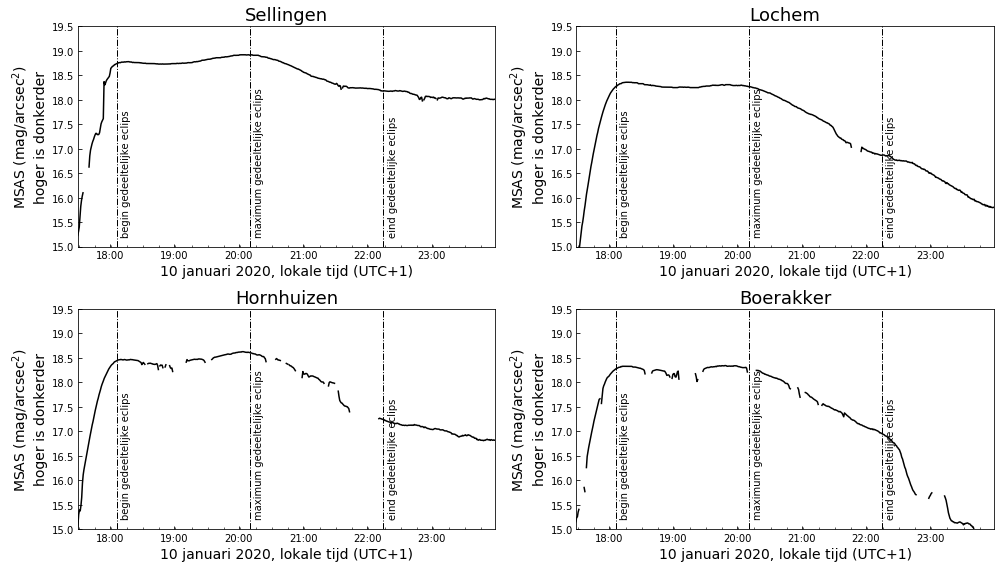

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

for axnum, location in enumerate(nice_locations):
    ax = axs[axnum//2, axnum%2]
    
    # Today
    df = big_df[(big_df["Location"] == location) & \
                (big_df["Local Date & Time"].dt.date == date(2020, 1, 10))]
    msas_data = remove_outliers(df["MSAS"])
    ax.plot(df["Local Date & Time"], msas_data, 'k');
    
    ax.tick_params(direction="in", which="both")

    ax.set_ylim((15, 19));
    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax.set_xlim((datetime(2020,1,10,17,30), datetime(2020,1,10, 23, 59)));
    ax.set_xlabel("10 januari 2020, lokale tijd (UTC+1)", fontsize=14)
    ax.set_ylabel("MSAS (mag/arcsec$^2$)\nhoger is donkerder", fontsize=14);
    ax.set_yticks(np.arange(15, 20, 0.5))
    ax.set_title(location, fontsize=18);
    ax.axvline(datetime(2020, 1, 10, 18, 6, 24), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 18, 10, 24), 15.2, 'begin gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    ax.axvline(datetime(2020, 1, 10, 20, 10, 39), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 20, 14, 39), 15.2, 'maximum gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    ax.axvline(datetime(2020, 1, 10, 22, 15, 0), c='k', linestyle='-.', linewidth=1)
    ax.text(datetime(2020, 1, 10, 22, 19, 0), 15.2, 'eind gedeeltelijke eclips',
            rotation=90, verticalalignment='bottom')
    
plt.tight_layout()